# 146. LRU Cache

### Difficulty: <font color = orange> Medium </font>

---

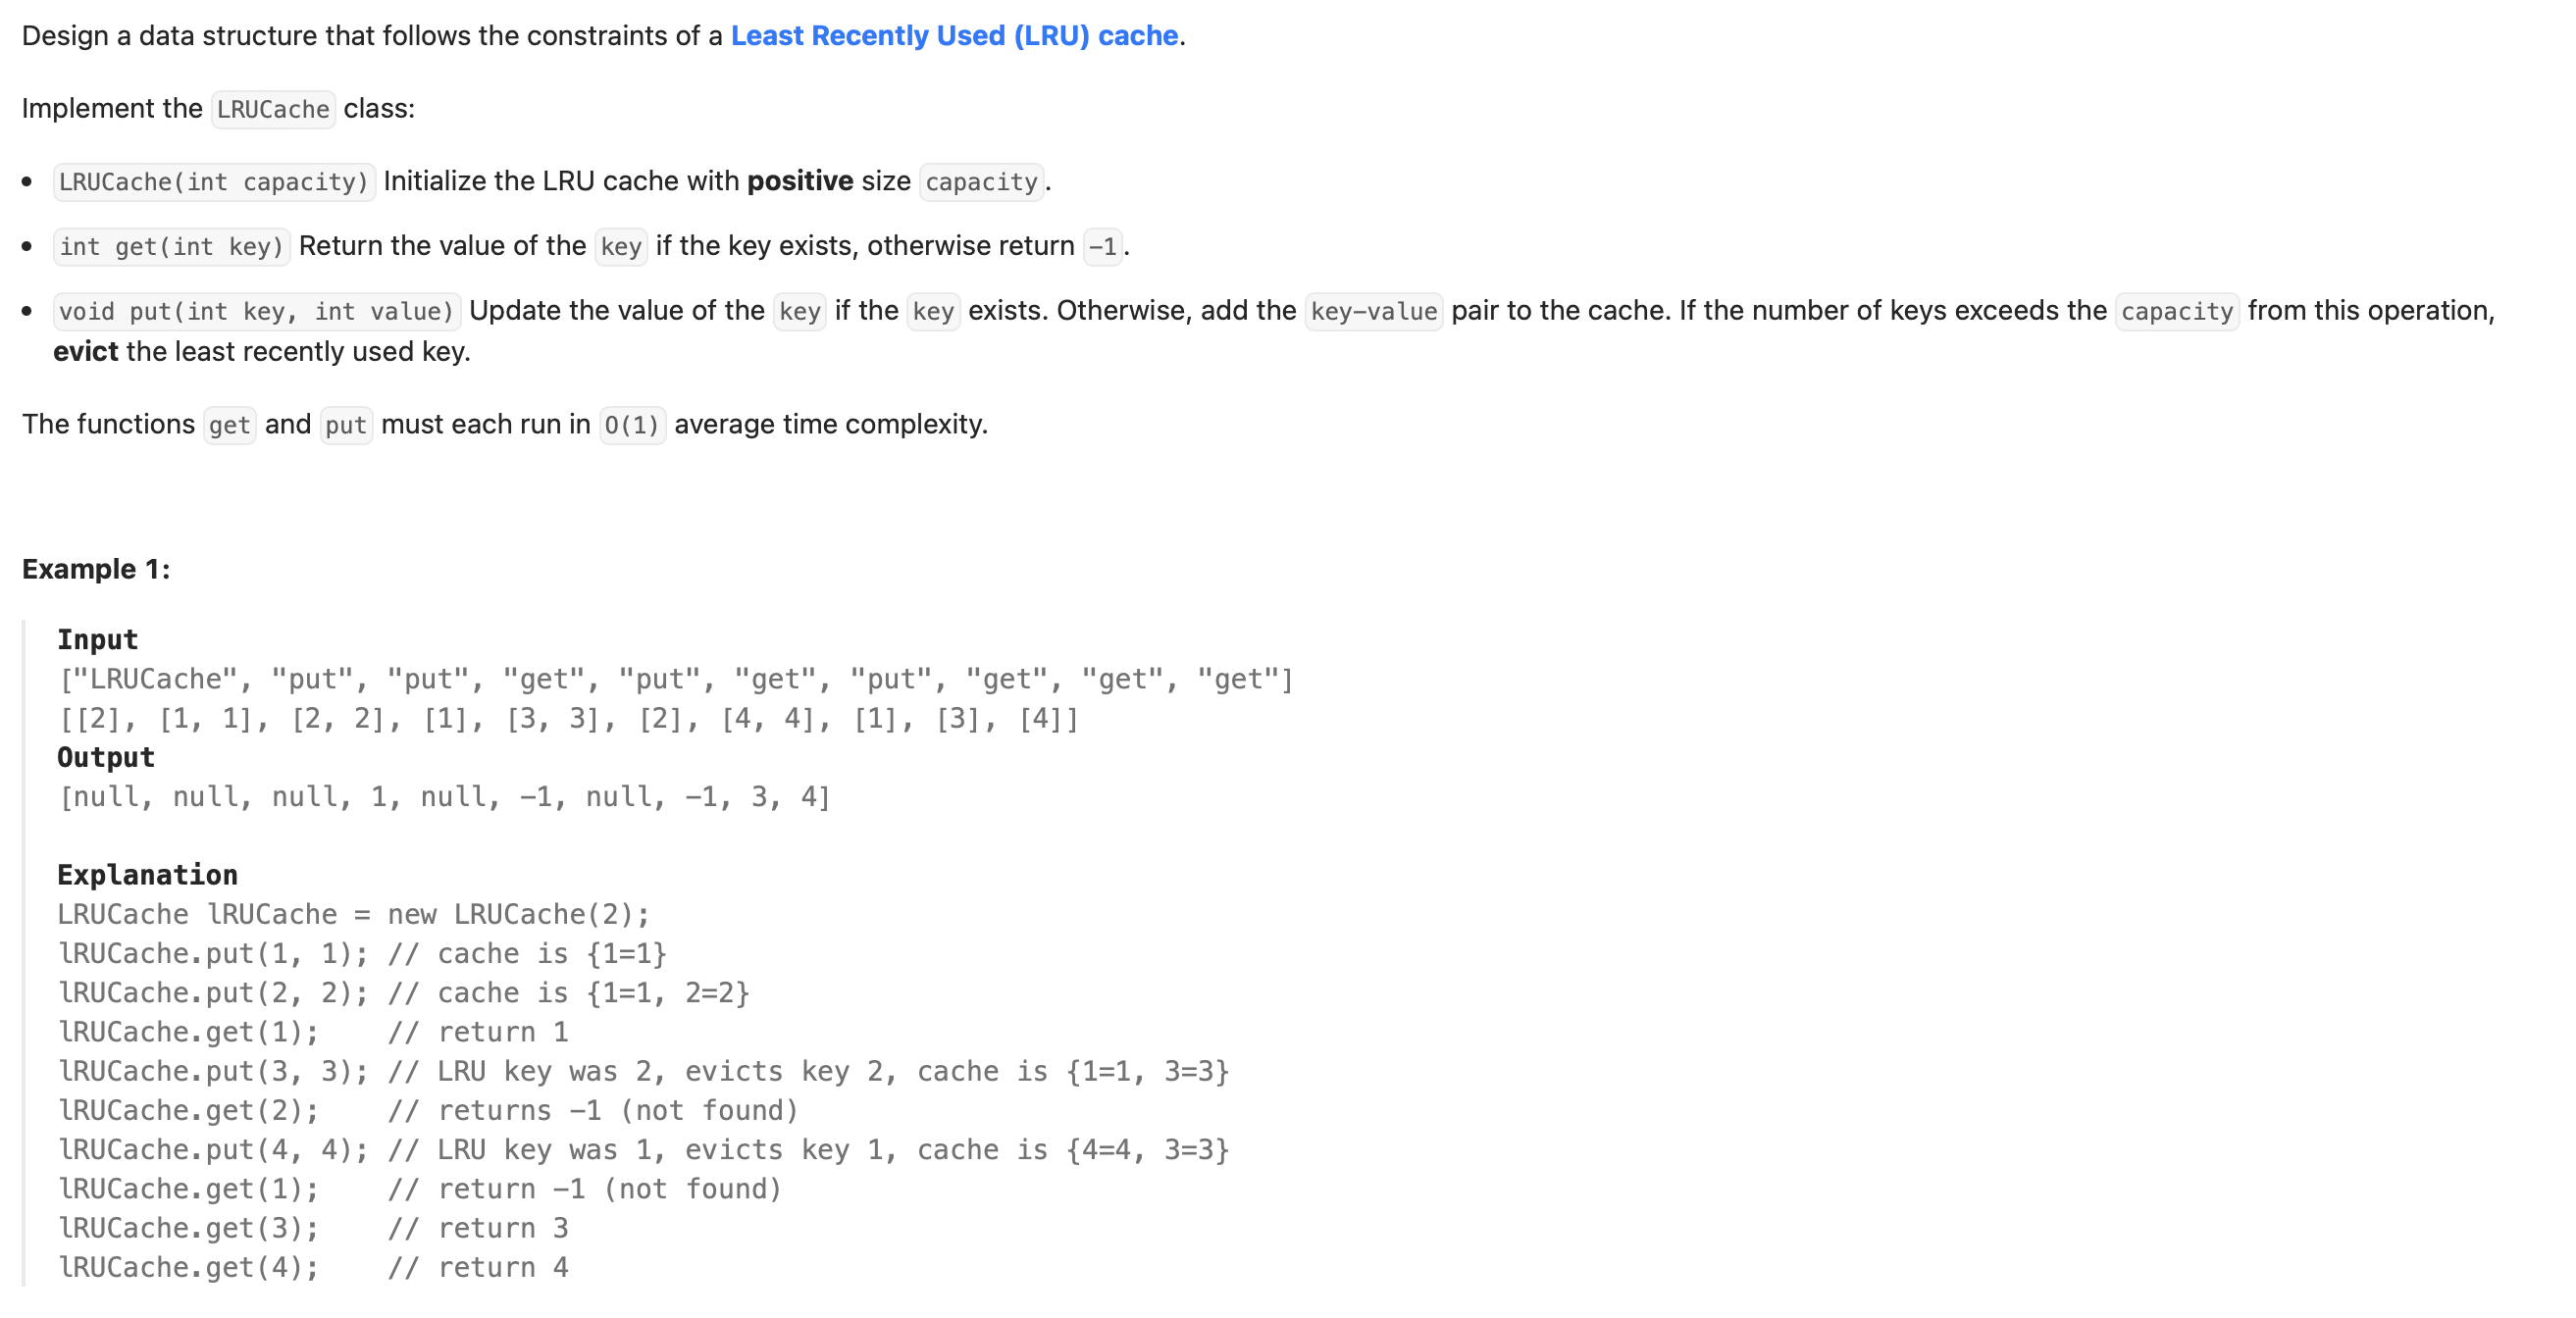

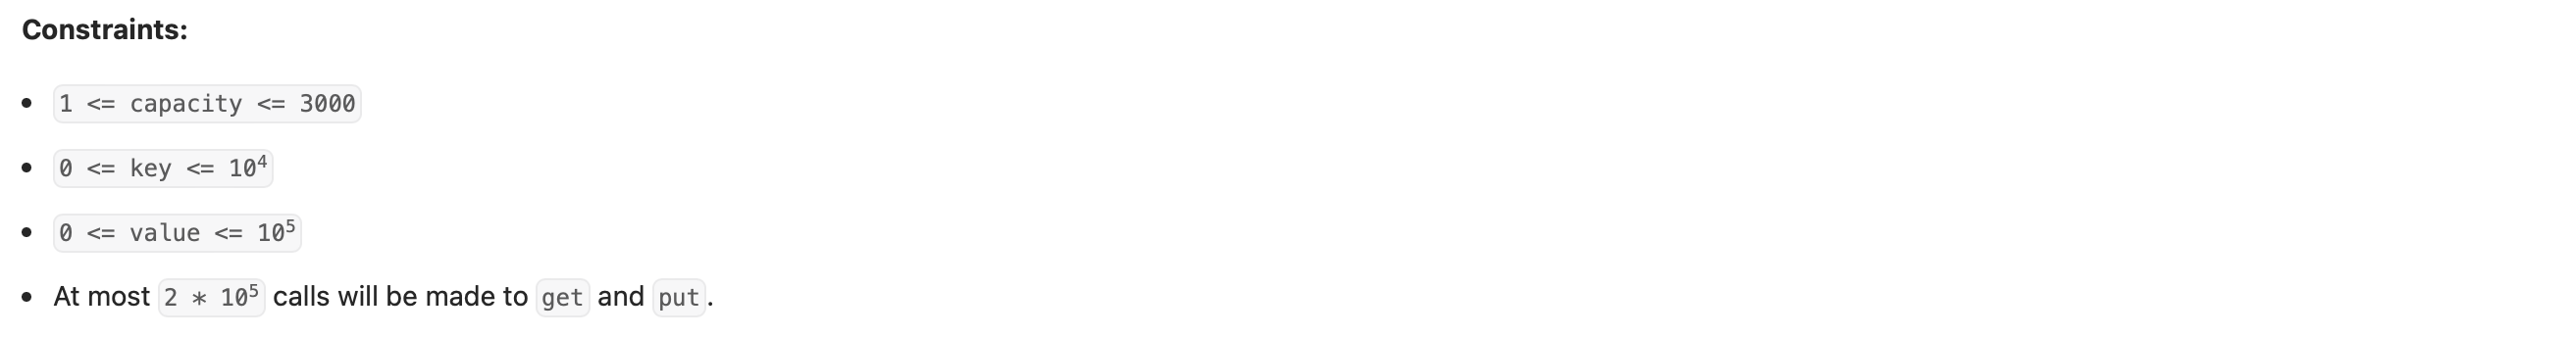

## Approach Overview:

We use a combination of a hash map and a doubly linked list to efficiently implement the LRU Cache. 

The hash map allows O(1) access to key-value pairs, while the doubly linked list maintains the order of usage, with the most recently used items at the front and the least recently used at the end. When the cache exceeds its capacity, the least recently used item is evicted in O(1) time. 

## Detailed Explanation:

To achieve **O(1) time complexity** for both `get` and `put` operations, the LRU Cache uses a combination of a hash map and a doubly linked list. 

The hash map (a dictionary in Python) stores entries in a **key: node** format, where each node is part of a doubly linked list. The **node** contains the cache entry’s **key**, **value**, and pointers to its **previous** and **next** nodes.

The hash map allows fast access to nodes in O(1) time using the key. 

When an entry is accessed or updated, the corresponding node must be moved to the front (head) of the doubly linked list to mark it as the most recently used. 

The doubly linked list efficiently maintains the order of usage, **enabling O(1) insertion, removal, and reordering of nodes**. When the cache exceeds its capacity, the least recently used item (at the tail) is removed in constant time.

Storing nodes instead of just key-value pairs in the hash map is crucial for maintaining O(1) time complexity, as it allows direct manipulation of the node’s position in the list without a costly search through the list.


#### How the **Doubly Linked List** Works:

- Each node in the doubly linked list contains:

  - **Key**: The unique identifier for the cache entry.
  - **Value**: The actual data stored in the cache entry.
  - **Next** and **Prev** pointers: These allow the node to efficiently point to the next and previous nodes in the list, enabling O(1) reordering.

---


- The **head** and **tail** nodes are dummy nodes used to simplify operations:

  - The **head** points to the most recently used node.
  - The **tail** points to the least recently used node.
  - When a node is accessed, it is moved to the position right after the **head**.
  - When a node needs to be evicted, it is removed from the position right before the **tail**.

#### Cache Invalidation (Eviction Policy):

When the cache exceeds its capacity, the **least recently used** entry needs to be evicted. This is where the doubly linked list's **tail** comes into play:

- The node just before the **tail** is the least recently used node.
- To evict it:

  - We remove it from the doubly linked list in O(1) time.
  - We also delete the corresponding key from the hash map in O(1) time.

#### Why Dummy Head and Tail Nodes are Used:

Using dummy head and tail nodes simplifies the linked list operations because:

- We don't have to check if the list is empty or deal with edge cases for adding/removing nodes from the start or end.
- This allows all operations (add, remove, move) to be performed uniformly and efficiently in O(1) time.


## Key Challenges:

To technically challenging. Couldn't implement it. 

## Solution:

In [ ]:
class LRUCache:
    class Node:
        def __init__(self, key, val):
            self.key = key
            self.val = val
            self.next = None
            self.prev = None

    def __init__(self, capacity: int):

        # initialize the cache as a dictionary to store key : node entries 
        self.cache = {}
        # initialize the capacity of the cache
        self.capacity = capacity

        # initializing the head node with a dummy value
        self.head = self.Node(-1, -1)
        # initializing the tail node with a dummy value
        self.tail = self.Node(-1, -1)

        # linking the head node and the tail node together
        self.head.next = self.tail
        self.tail.prev = self.head

    def get(self, key: int) -> int:

        # check if the key exists in cache
        if key in self.cache:

            # load the node associated with the current key
            node = self.cache[key]

            # update the position of the key (node) in the "recency" list
            # ......
            # remove the node from the list
            self.remove(node)
            # put the node to the head position of the list
            self.addToHead(node)
            
            # return the value corresponding to the key 
            return node.val

        else:
            # return -1 (since key doesn't exists in cache)
            return -1
        
    def put(self, key: int, value: int) -> None:

        # check if the key is already in cache
        if key in self.cache:
            # retrieve the node associated with the key
            node = self.cache[key]
            # update the value of the key
            node.val = value

            # re-position the node to the head of the list (most recently used)
            #    .........
            # delete the node from its current position in the list
            self.remove(node)
            # insert the node to the head position in the list
            self.addToHead(node)
        
        else:
            # create a new entry of the key in cache 
            self.cache[key] = self.Node(key, value)

            # add the new node to the head of the "recency" list
            self.addToHead(self.cache[key])
            
            # check if the number of entries in cache is more than capacity
            if len(self.cache) > self.capacity:
                # retrieve the current tail node in linked list (i.e. the least recently used entry)
                LRU = self.tail.prev
                # remove the least recently used node
                self.remove(LRU)
                # remove the least recently used entry from the cache 
                del self.cache[LRU.key]

    def remove(self, node):
        'Delete the input node from its current position in the list'

        # change the 'next pointer' of the former  node
        node.prev.next = node.next
        # change the 'previous pointer' of the upcoming node
        node.next.prev = node.prev 

    def addToHead(self, node):
        're-position the input node to the head of the list (right after the dummy head node of the list)'

        # set the next pointer of the current node
        node.next = self.head.next
        # set the previous pointer of the current node
        node.prev = self.head

        # link the previous pointer of the next node to the current node 
        (self.head.next).prev = node
        # make the current node the head node
        self.head.next = node

# Your LRUCache object will be instantiated and called as such:
# obj = LRUCache(capacity)
# param_1 = obj.get(key)
# obj.put(key,value)